In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [3]:
Data=pd.read_csv(r"C:\Users\hp\OneDrive\Masaüstü\Python (Data Science Academy)\Week 6\Day 2\loan_prediction.csv")

In [4]:
data=Data.copy()

In [5]:
data.drop("Loan_ID",axis=1,inplace=True)

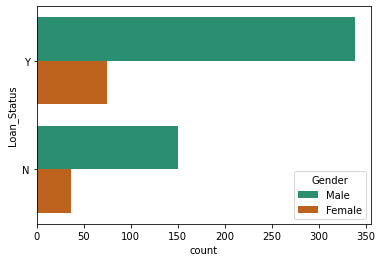

In [6]:
ax = sns.countplot(y=data['Loan_Status'], hue=data['Gender'],palette='Dark2')

In [7]:
data[["Gender","Loan_Status"]].value_counts()

Gender  Loan_Status
Male    Y              339
        N              150
Female  Y               75
        N               37
dtype: int64

In [8]:
print("Male Y %:",339/(339+150))
print("Female Y %:",75/(75+37))

Male Y %: 0.6932515337423313
Female Y %: 0.6696428571428571


In [9]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
print(data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [12]:
data.shape

(614, 12)

In [13]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

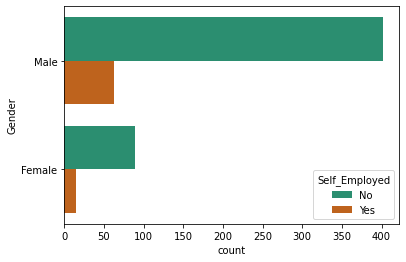

In [15]:
ax = sns.countplot(y=data['Gender'], hue=data['Self_Employed'],palette='Dark2')

In [16]:
data[["Gender","Self_Employed"]].value_counts()

Gender  Self_Employed
Male    No               402
Female  No                89
Male    Yes               63
Female  Yes               15
dtype: int64

In [17]:
print("Male Y %:",63/(63+402))
print("Female Y %:",15/(15+89))

Male Y %: 0.13548387096774195
Female Y %: 0.14423076923076922


In [133]:
data2=data.copy()

In [134]:
data2.drop("Gender",axis=1,inplace=True)

In [135]:
data2[data2["Married"].isnull()]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [136]:
data2=data2.drop(435,axis=0)

In [137]:
data2=data2.reset_index().drop("index",axis=1)

In [138]:
data2["CoapplicantIncome"].value_counts()

0.0       272
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [139]:
data2["ApplicantIncome"]

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
608    2900
609    4106
610    8072
611    7583
612    4583
Name: ApplicantIncome, Length: 613, dtype: int64

In [140]:
data2.isnull().sum()

Married               2
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
data2["Married"]=data2["Married"].fillna("Yes")

In [142]:
data2.isnull().sum()

Married               0
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
data2["Self_Employed"]=data2["Self_Employed"].fillna(data2["Self_Employed"].mode()[0])

In [144]:
data2["Credit_History"].value_counts()

1.0    474
0.0     89
Name: Credit_History, dtype: int64

In [30]:
data2[["LoanAmount","Credit_History","Loan_Amount_Term"]]

,LoanAmount,Credit_History,Loan_Amount_Term
0,NaN,1.0,360.0
1,128.0,1.0,360.0
2,66.0,1.0,360.0
3,120.0,1.0,360.0
4,141.0,1.0,360.0
...,...,...,...
608,71.0,1.0,360.0
609,40.0,1.0,180.0
610,253.0,1.0,360.0
611,187.0,1.0,360.0


In [32]:
data2.isnull().sum()

Married               0
Dependents           14
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
data["LoanAmount"].median()

128.0

<AxesSubplot:xlabel='LoanAmount'>

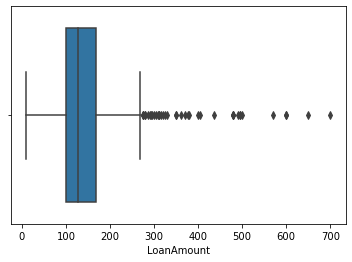

In [35]:
sns.boxplot(data2["LoanAmount"])

In [36]:
data2[data2["LoanAmount"]<280]["LoanAmount"].mode()

0    120.0
dtype: float64

In [73]:
data2[data2["ApplicantIncome"]<3812.0]["LoanAmount"].median()

111.0

In [60]:
x=data2[data2["LoanAmount"].isna()]

In [87]:
x[x["ApplicantIncome"]<3812.0]

ApplicantIncome      2397.5
CoapplicantIncome    1596.5
LoanAmount              NaN
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [89]:
data2[data2["ApplicantIncome"]<3812.0].median()

ApplicantIncome      2875.5
CoapplicantIncome    1759.5
LoanAmount            111.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [111]:
f1=data2["LoanAmount"].isna()

In [112]:
f2=data2["ApplicantIncome"]<3812.0

In [99]:
data2["LoanAmount"]=data2[f1&f2]["LoanAmount"]=111.0

In [122]:
data2.isna().sum()

Married               0
Dependents           14
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [145]:
f1=data2["LoanAmount"].isna()

In [146]:
f2=data2["ApplicantIncome"]<3812.0

In [147]:
data2.loc[f1&f2,"LoanAmount"]=111.0

In [148]:
data2

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
608,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [149]:
f3=data2["ApplicantIncome"]>3812.0

In [150]:
f4=data2["LoanAmount"].isna()

In [151]:
data2.loc[f3&f4,"LoanAmount"]=152.0

In [131]:
data2[f3]["LoanAmount"].median()

152.0

In [152]:
data2.isna().sum()

Married               0
Dependents           14
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
data2["Credit_History"].value_counts()

1.0    474
0.0     89
Name: Credit_History, dtype: int64

In [175]:
data2[data2["Credit_History"]==1]["ApplicantIncome"].mode()

0    2500
dtype: int64

In [177]:
data2[data2["Credit_History"]==0]["ApplicantIncome"]>5000

7      False
17     False
20      True
22     False
23     False
36     False
48     False
54      True
62     False
63     False
64     False
66     False
69     False
73     False
78     False
108    False
112    False
122    False
128     True
138     True
150     True
155     True
162    False
168    False
177     True
179    False
180     True
186    False
201    False
211    False
218    False
220    False
250    False
254     True
256     True
267    False
280    False
291    False
293     True
300    False
307    False
325     True
326    False
338    False
346    False
353     True
358    False
367     True
373    False
387    False
396    False
399    False
400    False
408     True
409     True
412     True
414    False
421    False
423     True
431     True
437     True
447    False
449    False
451    False
452    False
463    False
465    False
470    False
476    False
485    False
493    False
498     True
516    False
526     True
531    False
540    False
547    False

In [197]:
data2[data2["Credit_History"]==1]["Loan_Amount_Term"].

0    360.0
dtype: float64

In [202]:
data2.isna().sum()

Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [201]:
data2["Dependents"]=data2["Dependents"].fillna(data2["Dependents"].mode()[0])

In [204]:
data2.isna().sum()

Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [218]:
data2[data2["LoanAmount"]<128.0]["Loan_Amount_Term"].median()

360.0

In [223]:
data2[data2["LoanAmount"]>260]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
9,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
83,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
126,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
135,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N


Text(0.5, 1.0, 'Age_distribition_acording_to_pclass')

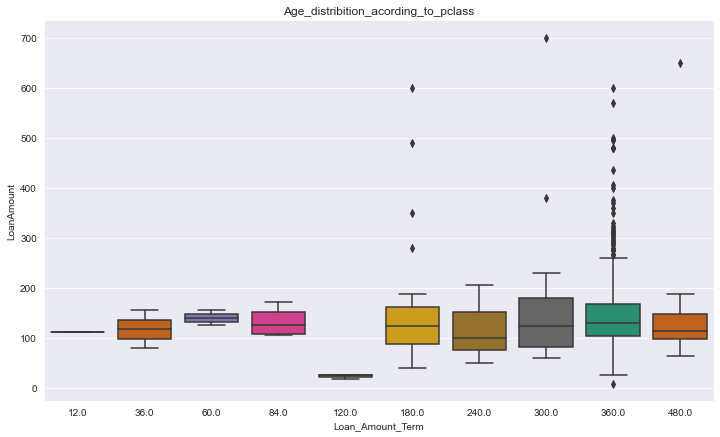

In [227]:
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.boxplot(x='Loan_Amount_Term',y='LoanAmount',data=data2,palette='Dark2').set_title('Age_distribition_acording_to_pclass')

In [256]:
data2[data2["Loan_Amount_Term"].isna()]["LoanAmount"].mode()[0]

120.0

In [253]:
data2[data2["LoanAmount"]==120]["Loan_Amount_Term"].median()

360.0

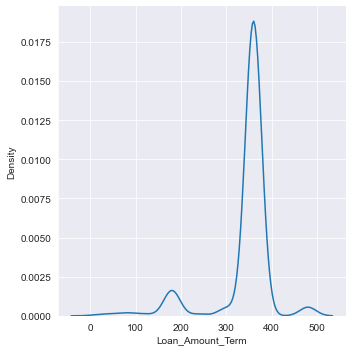

In [255]:
sns.displot(data2["Loan_Amount_Term"],kind="kde")

In [258]:
data2["Loan_Amount_Term"]=data2["Loan_Amount_Term"].fillna(data2[data2["Loan_Amount_Term"].isna()]["LoanAmount"].mode()[0])

In [260]:
data2.isna().sum()

Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [293]:
A=data2[["LoanAmount","ApplicantIncome","Credit_History","CoapplicantIncome"]]

In [299]:
A.groupby("Credit_History").agg({"CoapplicantIncome":"mean"})

,CoapplicantIncome
Credit_History,
0.0,1542.179775
1.0,1531.474515


In [352]:
A[A["Credit_History"]==0]["ApplicantIncome"].median()

3547.0

In [344]:
a1=data2["ApplicantIncome"]>3547

In [346]:
a2=data2["ApplicantIncome"]<=3858.5

In [350]:
a3=data2["Credit_History"].isna()

In [353]:
data2.loc[a1&a2&a3,"Credit_History"]=0

In [358]:
data2["Credit_History"]=data2["Credit_History"].fillna(1)

Text(0.5, 1.0, 'Age_distribition_acording_to_pclass')

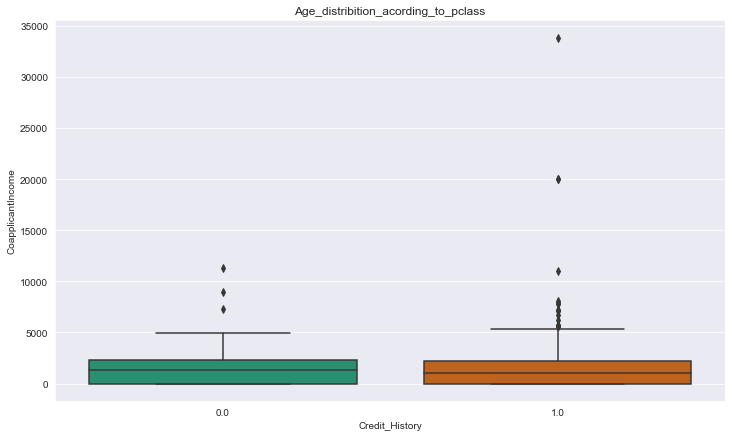

In [332]:
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.boxplot(x='Credit_History',y='CoapplicantIncome',data=data2,palette='Dark2').set_title('Age_distribition_acording_to_pclass')

In [333]:
data2["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
608    1.0
609    1.0
610    1.0
611    1.0
612    0.0
Name: Credit_History, Length: 613, dtype: float64

In [362]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            613 non-null    object 
 1   Dependents         613 non-null    object 
 2   Education          613 non-null    object 
 3   Self_Employed      613 non-null    object 
 4   ApplicantIncome    613 non-null    int64  
 5   CoapplicantIncome  613 non-null    float64
 6   LoanAmount         613 non-null    float64
 7   Loan_Amount_Term   613 non-null    float64
 8   Credit_History     613 non-null    float64
 9   Property_Area      613 non-null    object 
 10  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB


In [365]:
data2["Education"].value_counts()

Graduate        479
Not Graduate    134
Name: Education, dtype: int64

In [368]:
C=pd.get_dummies(data2[["Married","Dependents","Education","Self_Employed","Property_Area"]],drop_first=True)

In [372]:
data3=data2.drop(["Married","Dependents","Education","Self_Employed","Property_Area"],axis=1)

In [374]:
data3.loc[data3["Loan_Status"]=="Y","Loan_Status"]=1
data3.loc[data3["Loan_Status"]=="N","Loan_Status"]=0

In [379]:
FINAL=pd.concat([data3,C],axis=1)

In [433]:
FINAL["Loan_Status"]=FINAL["Loan_Status"].astype(int)

In [434]:
X=FINAL.drop("Loan_Status",axis=1)
y=FINAL["Loan_Status"]

In [435]:
scaler=RobustScaler()

In [436]:
SC=scaler.fit(X)

In [437]:
X.iloc[:]=SC.transform(X)

In [438]:
FINAL

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,152.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0
609,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
610,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
611,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [439]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.701446,-0.525630,0.369231,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.265496,0.129453,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.279614,-0.525630,-0.953846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.423209,0.498697,-0.123077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.753444,-0.525630,0.200000,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.314050,-0.525630,-0.876923,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0.101240,-0.525630,-1.353846,-180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
610,1.466942,-0.421373,1.923077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,1.298554,-0.525630,0.907692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [440]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Modelling

### VOTING Classifier

In [441]:
from sklearn.linear_model import LogisticRegression

In [442]:
from sklearn.ensemble import VotingClassifier

In [443]:
svc=SVC()
lr=LogisticRegression()
RF=RandomForestClassifier()


In [444]:
vot_cl=VotingClassifier(estimators=[('lr', lr), ('svc', svc),("rf",RF)],
                         voting='hard')

In [445]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.701446,-0.525630,0.369231,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.265496,0.129453,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.279614,-0.525630,-0.953846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.423209,0.498697,-0.123077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.753444,-0.525630,0.200000,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.314050,-0.525630,-0.876923,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0.101240,-0.525630,-1.353846,-180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
610,1.466942,-0.421373,1.923077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,1.298554,-0.525630,0.907692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [448]:
vot=vot_cl.fit(X_train,y_train)

In [450]:
y_pred=vot.predict(X_test)

In [451]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        58
           1       0.83      0.98      0.90       126

    accuracy                           0.85       184
   macro avg       0.89      0.78      0.81       184
weighted avg       0.87      0.85      0.84       184



In [453]:
from sklearn.metrics import accuracy_score

In [454]:
accuracy_score(y_test,y_pred)

0.8532608695652174

In [457]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.701446,-0.525630,0.369231,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.265496,0.129453,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.279614,-0.525630,-0.953846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.423209,0.498697,-0.123077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.753444,-0.525630,0.200000,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.314050,-0.525630,-0.876923,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0.101240,-0.525630,-1.353846,-180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
610,1.466942,-0.421373,1.923077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,1.298554,-0.525630,0.907692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Bagging

In [458]:
rfc=RandomForestClassifier()
bag=BaggingClassifier(base_estimator=rfc,n_estimators=10,max_samples=0.4,max_features=13,bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=123)

In [459]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(),
                  bootstrap_features=True, max_features=13, max_samples=0.4,
                  n_jobs=-1, random_state=123)

In [462]:
y_pred1=bag.predict(X_test)

In [464]:
accuracy_score(y_test,y_pred1)

0.8532608695652174

In [465]:
grd=GradientBoostingClassifier()

In [466]:
grd.fit(X_train,y_train)

GradientBoostingClassifier()

In [469]:
y_pred2=grd.predict(X_test)

In [470]:
accuracy_score(y_test,y_pred2)

0.7771739130434783

In [471]:
xgb=XGBClassifier()

In [474]:
y_pred3=xgb.fit(X_train,y_train).predict(X_test)

In [475]:
accuracy_score(y_test,y_pred3)

0.7989130434782609

In [476]:
import lightgbm as lgb

# Catboost Classifier

In [478]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred_4 = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Learning rate set to 0.007178
0:	learn: 0.6894213	total: 2.29ms	remaining: 2.29s
1:	learn: 0.6865986	total: 3.73ms	remaining: 1.86s
2:	learn: 0.6838396	total: 4.83ms	remaining: 1.61s
3:	learn: 0.6808453	total: 6.9ms	remaining: 1.72s
4:	learn: 0.6777074	total: 9.55ms	remaining: 1.9s
5:	learn: 0.6746958	total: 11.8ms	remaining: 1.96s
6:	learn: 0.6714321	total: 14.1ms	remaining: 2s
7:	learn: 0.6688441	total: 15.6ms	remaining: 1.93s
8:	learn: 0.6654192	total: 18ms	remaining: 1.99s
9:	learn: 0.6628904	total: 19.6ms	remaining: 1.94s
10:	learn: 0.6596328	total: 21.8ms	remaining: 1.96s
11:	learn: 0.6569832	total: 24.3ms	remaining: 2s
12:	learn: 0.6542055	total: 26.5ms	remaining: 2.01s
13:	learn: 0.6516666	total: 28.7ms	remaining: 2.02s
14:	learn: 0.6491874	total: 30.6ms	remaining: 2.01s
15:	learn: 0.6466823	total: 32.8ms	remaining: 2.02s
16:	learn: 0.6440104	total: 34.9ms	remaining: 2.02s
17:	learn: 0.6413654	total: 37ms	remaining: 2.02s
18:	learn: 0.6385301	total: 39.3ms	remaining: 2.03s
19:	

160:	learn: 0.4648600	total: 344ms	remaining: 1.79s
161:	learn: 0.4642970	total: 347ms	remaining: 1.79s
162:	learn: 0.4640827	total: 349ms	remaining: 1.79s
163:	learn: 0.4638421	total: 351ms	remaining: 1.79s
164:	learn: 0.4634451	total: 354ms	remaining: 1.79s
165:	learn: 0.4628222	total: 356ms	remaining: 1.79s
166:	learn: 0.4621796	total: 358ms	remaining: 1.79s
167:	learn: 0.4611420	total: 361ms	remaining: 1.79s
168:	learn: 0.4607154	total: 364ms	remaining: 1.79s
169:	learn: 0.4599774	total: 367ms	remaining: 1.79s
170:	learn: 0.4594372	total: 370ms	remaining: 1.79s
171:	learn: 0.4586292	total: 372ms	remaining: 1.79s
172:	learn: 0.4580594	total: 375ms	remaining: 1.79s
173:	learn: 0.4573488	total: 378ms	remaining: 1.79s
174:	learn: 0.4568542	total: 381ms	remaining: 1.8s
175:	learn: 0.4562147	total: 384ms	remaining: 1.8s
176:	learn: 0.4557674	total: 387ms	remaining: 1.8s
177:	learn: 0.4552376	total: 390ms	remaining: 1.8s
178:	learn: 0.4547455	total: 392ms	remaining: 1.8s
179:	learn: 0.454

348:	learn: 0.3864442	total: 1.04s	remaining: 1.94s
349:	learn: 0.3862818	total: 1.04s	remaining: 1.94s
350:	learn: 0.3860223	total: 1.05s	remaining: 1.94s
351:	learn: 0.3857860	total: 1.06s	remaining: 1.95s
352:	learn: 0.3854736	total: 1.06s	remaining: 1.95s
353:	learn: 0.3851764	total: 1.07s	remaining: 1.96s
354:	learn: 0.3848759	total: 1.07s	remaining: 1.95s
355:	learn: 0.3844727	total: 1.08s	remaining: 1.95s
356:	learn: 0.3842052	total: 1.08s	remaining: 1.95s
357:	learn: 0.3839036	total: 1.09s	remaining: 1.96s
358:	learn: 0.3836639	total: 1.09s	remaining: 1.95s
359:	learn: 0.3834337	total: 1.1s	remaining: 1.95s
360:	learn: 0.3830870	total: 1.1s	remaining: 1.96s
361:	learn: 0.3825592	total: 1.11s	remaining: 1.96s
362:	learn: 0.3824304	total: 1.12s	remaining: 1.96s
363:	learn: 0.3821695	total: 1.12s	remaining: 1.96s
364:	learn: 0.3819659	total: 1.13s	remaining: 1.96s
365:	learn: 0.3818340	total: 1.13s	remaining: 1.96s
366:	learn: 0.3816977	total: 1.14s	remaining: 1.96s
367:	learn: 0.

530:	learn: 0.3396298	total: 1.74s	remaining: 1.54s
531:	learn: 0.3394815	total: 1.75s	remaining: 1.54s
532:	learn: 0.3392371	total: 1.76s	remaining: 1.54s
533:	learn: 0.3390998	total: 1.76s	remaining: 1.54s
534:	learn: 0.3388528	total: 1.77s	remaining: 1.54s
535:	learn: 0.3387442	total: 1.77s	remaining: 1.54s
536:	learn: 0.3385478	total: 1.78s	remaining: 1.54s
537:	learn: 0.3383457	total: 1.79s	remaining: 1.53s
538:	learn: 0.3381176	total: 1.79s	remaining: 1.53s
539:	learn: 0.3379411	total: 1.8s	remaining: 1.53s
540:	learn: 0.3376962	total: 1.8s	remaining: 1.53s
541:	learn: 0.3374704	total: 1.81s	remaining: 1.53s
542:	learn: 0.3370718	total: 1.81s	remaining: 1.52s
543:	learn: 0.3370517	total: 1.82s	remaining: 1.52s
544:	learn: 0.3368831	total: 1.82s	remaining: 1.52s
545:	learn: 0.3367182	total: 1.82s	remaining: 1.52s
546:	learn: 0.3362425	total: 1.83s	remaining: 1.51s
547:	learn: 0.3360428	total: 1.83s	remaining: 1.51s
548:	learn: 0.3358191	total: 1.84s	remaining: 1.51s
549:	learn: 0.

723:	learn: 0.3014407	total: 2.57s	remaining: 979ms
724:	learn: 0.3013109	total: 2.57s	remaining: 976ms
725:	learn: 0.3009645	total: 2.58s	remaining: 973ms
726:	learn: 0.3007237	total: 2.58s	remaining: 969ms
727:	learn: 0.3004830	total: 2.58s	remaining: 966ms
728:	learn: 0.3002157	total: 2.59s	remaining: 963ms
729:	learn: 0.2999842	total: 2.59s	remaining: 959ms
730:	learn: 0.2998622	total: 2.6s	remaining: 956ms
731:	learn: 0.2996232	total: 2.6s	remaining: 952ms
732:	learn: 0.2993285	total: 2.6s	remaining: 949ms
733:	learn: 0.2991085	total: 2.61s	remaining: 946ms
734:	learn: 0.2988994	total: 2.61s	remaining: 942ms
735:	learn: 0.2986435	total: 2.62s	remaining: 939ms
736:	learn: 0.2984461	total: 2.62s	remaining: 936ms
737:	learn: 0.2983287	total: 2.63s	remaining: 932ms
738:	learn: 0.2981327	total: 2.63s	remaining: 929ms
739:	learn: 0.2980413	total: 2.63s	remaining: 926ms
740:	learn: 0.2978505	total: 2.64s	remaining: 922ms
741:	learn: 0.2976525	total: 2.64s	remaining: 919ms
742:	learn: 0.2

895:	learn: 0.2671153	total: 3.4s	remaining: 395ms
896:	learn: 0.2668360	total: 3.4s	remaining: 391ms
897:	learn: 0.2667231	total: 3.41s	remaining: 387ms
898:	learn: 0.2665251	total: 3.41s	remaining: 384ms
899:	learn: 0.2663859	total: 3.42s	remaining: 380ms
900:	learn: 0.2662867	total: 3.42s	remaining: 376ms
901:	learn: 0.2660939	total: 3.42s	remaining: 372ms
902:	learn: 0.2660208	total: 3.43s	remaining: 368ms
903:	learn: 0.2658793	total: 3.43s	remaining: 365ms
904:	learn: 0.2657113	total: 3.44s	remaining: 361ms
905:	learn: 0.2655170	total: 3.44s	remaining: 357ms
906:	learn: 0.2652487	total: 3.44s	remaining: 353ms
907:	learn: 0.2651557	total: 3.45s	remaining: 350ms
908:	learn: 0.2650871	total: 3.45s	remaining: 346ms
909:	learn: 0.2649268	total: 3.46s	remaining: 342ms
910:	learn: 0.2646733	total: 3.46s	remaining: 338ms
911:	learn: 0.2644042	total: 3.46s	remaining: 334ms
912:	learn: 0.2642919	total: 3.47s	remaining: 331ms
913:	learn: 0.2640929	total: 3.47s	remaining: 327ms
914:	learn: 0.

In [479]:
print(accuracy_score(y_test,y_pred))

0.8532608695652174
